In [38]:
#KÜTÜPHANELER
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier,XGBRegressor
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings("ignore")

In [39]:
#!pip install xgboost
#XGBRegressor?

In [40]:
dist = pd.read_excel("piksel_matris8.xlsx")
dist.head(20)
dist.shape
pd.isnull(dist["Sonuç"]).sum()

0

In [41]:
dist.shape

(414, 10)

In [42]:
df=dist.copy()

In [43]:
df.head(10)

,Unnamed: 0,AX1,AX2,AY1,BX1,BX2,BY1,PX,PY,Sonuç
0,"150SOL6,2M",363.5,4244.5,2097.0,2363.0,2245.0,2103.0,1999.5,6.0,6.2
1,"150SOL7,2M",449.0,4159.0,1955.5,2545.5,2062.5,1979.5,2096.5,24.0,7.2
2,"150SOL8,2M",507.5,4100.5,1848.0,2687.5,1920.5,1881.5,2180.0,33.5,8.2
3,"150SOL10,2M",599.0,4009.0,1704.0,2898.0,1710.0,1743.0,2299.0,39.0,10.2
4,"150SOL11,2M",611.5,3996.5,1683.5,2963.5,1644.5,1721.5,2352.0,38.0,11.2
5,"150SOL12,2M",665.0,3943.0,1659.0,3058.0,1550.0,1694.5,2393.0,35.5,12.2
6,"150SOL13,2M",688.0,3920.0,1642.0,3118.5,1489.5,1675.5,2430.5,33.5,13.2
7,"150SOL14,2M",711.5,3896.5,1596.0,3175.5,1432.5,1632.0,2464.0,36.0,14.2
8,"150SOL15,2M",722.0,3886.0,1532.0,3213.0,1395.0,1569.5,2491.0,37.5,15.2
9,"150SOL17,2M",763.0,3845.0,1534.0,3287.0,1321.0,1569.5,2524.0,35.5,17.2


In [44]:
df=df.iloc[:,1:len(df)]

In [45]:
df.head()

,AX1,AX2,AY1,BX1,BX2,BY1,PX,PY,Sonuç
0,363.5,4244.5,2097.0,2363.0,2245.0,2103.0,1999.5,6.0,6.2
1,449.0,4159.0,1955.5,2545.5,2062.5,1979.5,2096.5,24.0,7.2
2,507.5,4100.5,1848.0,2687.5,1920.5,1881.5,2180.0,33.5,8.2
3,599.0,4009.0,1704.0,2898.0,1710.0,1743.0,2299.0,39.0,10.2
4,611.5,3996.5,1683.5,2963.5,1644.5,1721.5,2352.0,38.0,11.2


In [46]:
df.shape

(414, 9)

In [47]:
y=df["Sonuç"]
x=df.drop("Sonuç",axis=1)

In [48]:
x.head()

,AX1,AX2,AY1,BX1,BX2,BY1,PX,PY
0,363.5,4244.5,2097.0,2363.0,2245.0,2103.0,1999.5,6.0
1,449.0,4159.0,1955.5,2545.5,2062.5,1979.5,2096.5,24.0
2,507.5,4100.5,1848.0,2687.5,1920.5,1881.5,2180.0,33.5
3,599.0,4009.0,1704.0,2898.0,1710.0,1743.0,2299.0,39.0
4,611.5,3996.5,1683.5,2963.5,1644.5,1721.5,2352.0,38.0


In [49]:
y.head()

0     6.2
1     7.2
2     8.2
3    10.2
4    11.2
Name: Sonuç, dtype: float64

In [50]:
y

0       6.2
1       7.2
2       8.2
3      10.2
4      11.2
       ... 
409    34.2
410    41.2
411    48.2
412    55.2
413    62.2
Name: Sonuç, Length: 414, dtype: float64

In [51]:
x

,AX1,AX2,AY1,BX1,BX2,BY1,PX,PY
0,363.5,4244.5,2097.0,2363.0,2245.0,2103.0,1999.5,6.0
1,449.0,4159.0,1955.5,2545.5,2062.5,1979.5,2096.5,24.0
2,507.5,4100.5,1848.0,2687.5,1920.5,1881.5,2180.0,33.5
3,599.0,4009.0,1704.0,2898.0,1710.0,1743.0,2299.0,39.0
4,611.5,3996.5,1683.5,2963.5,1644.5,1721.5,2352.0,38.0
...,...,...,...,...,...,...,...,...
409,1049.0,3559.0,1782.0,3765.0,843.0,1827.5,2716.0,45.0
410,964.5,3643.5,1680.0,3705.0,903.0,1728.5,2740.5,48.5
411,950.5,3657.5,1676.0,3710.0,898.0,1725.0,2759.5,49.0
412,973.0,3635.0,1638.5,3748.5,859.5,1683.5,2775.5,45.0


In [52]:
y_train=y[0:352]

In [53]:
y_train

0       6.2
1       7.2
2       8.2
3      10.2
4      11.2
       ... 
347    57.2
348    58.2
349    59.2
350    60.2
351    61.2
Name: Sonuç, Length: 352, dtype: float64

In [54]:
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=60)

In [55]:
y_test=y[352:]

In [56]:
y_test

352     9.2
353    16.2
354    23.2
355    30.2
356    37.2
       ... 
409    34.2
410    41.2
411    48.2
412    55.2
413    62.2
Name: Sonuç, Length: 62, dtype: float64

In [57]:
x_scaled=x/4343.5

In [58]:
x_scaled[:5]

,AX1,AX2,AY1,BX1,BX2,BY1,PX,PY
0,0.083688,0.977207,0.482790,0.544031,0.516864,0.484172,0.460343,0.001381
1,0.103373,0.957523,0.450213,0.586048,0.474847,0.455738,0.482675,0.005525
2,0.116841,0.944054,0.425463,0.618741,0.442155,0.433176,0.501899,0.007713
3,0.137907,0.922988,0.392310,0.667204,0.393692,0.401289,0.529297,0.008979
4,0.140785,0.920111,0.387591,0.682284,0.378612,0.396339,0.541499,0.008749


In [59]:
y_scaled=(y-3.2)/(62.2-3.2)

In [60]:
y_scaled

0      0.050847
1      0.067797
2      0.084746
3      0.118644
4      0.135593
         ...   
409    0.525424
410    0.644068
411    0.762712
412    0.881356
413    1.000000
Name: Sonuç, Length: 414, dtype: float64

In [61]:
x_train_scaled=x_scaled[0:352]

In [62]:
x_train_scaled

,AX1,AX2,AY1,BX1,BX2,BY1,PX,PY
0,0.083688,0.977207,0.482790,0.544031,0.516864,0.484172,0.460343,0.001381
1,0.103373,0.957523,0.450213,0.586048,0.474847,0.455738,0.482675,0.005525
2,0.116841,0.944054,0.425463,0.618741,0.442155,0.433176,0.501899,0.007713
3,0.137907,0.922988,0.392310,0.667204,0.393692,0.401289,0.529297,0.008979
4,0.140785,0.920111,0.387591,0.682284,0.378612,0.396339,0.541499,0.008749
...,...,...,...,...,...,...,...,...
347,0.217106,0.843790,0.380684,0.857028,0.203868,0.391965,0.639922,0.011281
348,0.211350,0.849545,0.385864,0.851157,0.209739,0.397836,0.639807,0.011972
349,0.225394,0.835501,0.394267,0.866582,0.194313,0.402556,0.641188,0.008288
350,0.226891,0.834005,0.383331,0.867849,0.193047,0.393577,0.640958,0.010245


In [63]:
x_test_scaled=x_scaled[352:]

In [64]:
x_test_scaled

,AX1,AX2,AY1,BX1,BX2,BY1,PX,PY
352,0.131115,0.929780,0.406469,0.647750,0.413146,0.414988,0.516634,0.008518
353,0.168873,0.892023,0.343156,0.748245,0.312651,0.347876,0.579371,0.004720
354,0.185565,0.875331,0.323587,0.788074,0.272821,0.330148,0.602509,0.006562
355,0.198457,0.862438,0.309198,0.815702,0.245194,0.313572,0.617244,0.004374
356,0.199493,0.861402,0.301830,0.827213,0.233683,0.305859,0.627720,0.004029
...,...,...,...,...,...,...,...,...
409,0.241510,0.819385,0.410268,0.866812,0.194083,0.420744,0.625302,0.010360
410,0.222056,0.838840,0.386785,0.852999,0.207897,0.397951,0.630943,0.011166
411,0.218833,0.842063,0.385864,0.854150,0.206746,0.397145,0.635317,0.011281
412,0.224013,0.836883,0.377230,0.863014,0.197882,0.387591,0.639001,0.010360


In [65]:
#y_train_scaled=y_scaled[0:352]

In [66]:
#y_train_scaled

In [67]:
#y_test_scaled=y_scaled[352:]

In [68]:
#y_test_scaled

In [69]:
#RandomForestRegressor?

In [70]:
rf_model = RandomForestRegressor()

In [71]:
#regr.fit(x_train_scaled, y_train)

In [72]:
#y_pred=regr.predict(x_test_scaled)

In [73]:
cart_params={"n_estimators":[75,100,125],"max_features":[1,5,10],"max_depth":[5,10],"random_state":[5,10,50]}
cart_cv_model=GridSearchCV(rf_model,cart_params,cv=10)

In [74]:
cart_cv_model.fit(x_train_scaled,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10], 'max_features': [1, 5, 10],
                         'n_estimators': [75, 100, 125],
                         'random_state': [5, 10, 50]})

In [75]:
cart_cv_model.best_params_

{'max_depth': 10, 'max_features': 5, 'n_estimators': 75, 'random_state': 50}

In [76]:
y_pred=cart_cv_model.predict(x_test_scaled)

In [77]:
mape_deger=mean_absolute_percentage_error(y_test,y_pred)

In [78]:
mape_deger*100

3.565268112833555

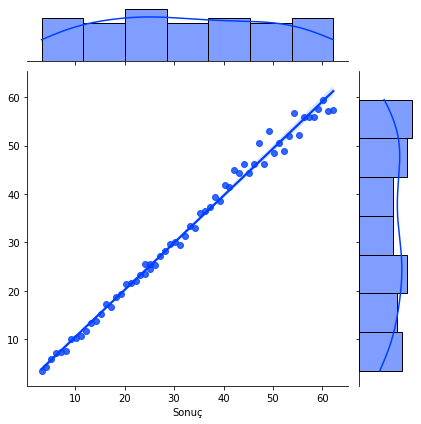

In [79]:
plt.style.use("seaborn-bright")
sns.jointplot(y_test, y_pred, kind="reg")
plt.show()